In [1]:
import pandas as pd

#### Reading in the Train data

In [2]:
train = pd.read_csv('train.csv')

In [3]:
train

0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY  \
0        0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
1        0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
2        0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
3        0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4        0  1467811372  Mon Apr 06 22:20:00 PDT 2009  NO_QUERY   
...     ..         ...                           ...       ...   
1599994  4  2193601966  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599995  4  2193601969  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599996  4  2193601991  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599997  4  2193602064  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599998  4  2193602129  Tue Jun 16 08:40:50 PDT 2009  NO_QUERY   

         _TheSpecialOne_  \
0          scotthamilton   
1               mattycus   
2                ElleCTF   
3                 Karoli   
4               joy_wolf   
...                  ...   
1599994  AmandaMarie1028   
1599995      TheWDBoards   
1599996           bpbabe   
1599997     tinydiamondz   
1599998   RyanTrevMorris   

        @switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D  
0        is upset that he can't update his Facebook by ...                                                                   
1        @Kenichan I dived many times for the ball. Man...                                                                   
2          my whole body feels itchy and like its on fire                                                                    
3        @nationwideclass no, it's not behaving at all....                                                                   
4                            @Kwesidei not the whole crew                                                                    
...                                                    ...                                                                   
1599994  Just woke up. Having no school is the best fee...                                                                   
1599995  TheWDB.com - Very cool to hear old Walt interv...                                                                   
1599996  Are you ready for your MoJo Makeover? Ask me f...                                                                   
1599997  Happy 38th Birthday to my boo of alll time!!! ...                                                                   
1599998  happy #charitytuesday @theNSPCC @SparksCharity...                                                                   

[1599999 rows x 6 columns]

#### Renaming the columns because the were not read in correct

In [4]:
train.columns = ['Target','Id','DateTime','Flag','User','Tweet']

#### Lets check to see if the data we have is balanced

In [5]:
train.Target.value_counts()

4    800000
0    799999
Name: Target, dtype: int64

#### Almost perfectly balanced. No need to resample or scale the data. Lets take a sample of 1/5th of the data we have. 

In [6]:
newtrain = train.sample(n = 300000)

In [7]:
newtrain = newtrain.reset_index()

#### Lets check if the sample is balanced or not

In [8]:
newtrain.Target.value_counts()

4    150164
0    149836
Name: Target, dtype: int64

#### The data is pretty well balanced. Lets continue

In [9]:
newtrain

index  Target          Id                      DateTime      Flag  \
0        963124       4  1827413061  Sun May 17 10:39:30 PDT 2009  NO_QUERY   
1       1205103       4  1986472430  Sun May 31 18:52:52 PDT 2009  NO_QUERY   
2       1058517       4  1962959710  Fri May 29 11:59:20 PDT 2009  NO_QUERY   
3        997411       4  1836064266  Mon May 18 07:18:04 PDT 2009  NO_QUERY   
4        878128       4  1685172280  Sat May 02 23:19:20 PDT 2009  NO_QUERY   
...         ...     ...         ...                           ...       ...   
299995   649449       0  2237293849  Fri Jun 19 05:32:52 PDT 2009  NO_QUERY   
299996   648977       0  2237167161  Fri Jun 19 05:18:39 PDT 2009  NO_QUERY   
299997   136336       0  1880077000  Fri May 22 00:01:40 PDT 2009  NO_QUERY   
299998   848557       4  1564854239  Mon Apr 20 05:09:02 PDT 2009  NO_QUERY   
299999   149921       0  1883573808  Fri May 22 08:46:05 PDT 2009  NO_QUERY   

                   User                                              Tweet  
0              ranajune                       @mringlein so glad you came   
1            jnydelonge  @heyitsMade  ei g pnasaran yg ballack maen d t...  
2          MsKharynBaby  Yummmm Sonic Bacon cheeseburger with extra bac...  
3          athanaelucev  @katiepeps maybe the best use for your peas  h...  
4         pinktoque_she  @fairly_biased oh damn... really? it's working...  
...                 ...                                                ...  
299995     sodapopsonia        @tadericson theresno tar ice cream anymore   
299996    BigNeLLyMarko  In line at ApPLe on 14th street .... And reali...  
299997  StephoneyAnnexo  @Riskybusinessmb we just got here and youre gone   
299998         elle2007                                Happy 420 everyone   
299999     WayneMcNicol  @Jediwannabe oohh nice....I was just wondering...  

[300000 rows x 7 columns]

#### The 0-4 scale is pretty ambiguous. Lets replace them with Negative if its 0 and positive if its 4. 

In [10]:
for i in range (0,300000):
    if newtrain.Target.iloc[i] == 0: 
        newtrain.Target.iloc[i] = 'Negative'
    else:
        newtrain.Target.iloc[i] = 'Positive'

/opt/conda/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [11]:
newtrain = newtrain.drop(['index'],axis=1)

In [12]:
newtrain

Target          Id                      DateTime      Flag  \
0       Positive  1827413061  Sun May 17 10:39:30 PDT 2009  NO_QUERY   
1       Positive  1986472430  Sun May 31 18:52:52 PDT 2009  NO_QUERY   
2       Positive  1962959710  Fri May 29 11:59:20 PDT 2009  NO_QUERY   
3       Positive  1836064266  Mon May 18 07:18:04 PDT 2009  NO_QUERY   
4       Positive  1685172280  Sat May 02 23:19:20 PDT 2009  NO_QUERY   
...          ...         ...                           ...       ...   
299995  Negative  2237293849  Fri Jun 19 05:32:52 PDT 2009  NO_QUERY   
299996  Negative  2237167161  Fri Jun 19 05:18:39 PDT 2009  NO_QUERY   
299997  Negative  1880077000  Fri May 22 00:01:40 PDT 2009  NO_QUERY   
299998  Positive  1564854239  Mon Apr 20 05:09:02 PDT 2009  NO_QUERY   
299999  Negative  1883573808  Fri May 22 08:46:05 PDT 2009  NO_QUERY   

                   User                                              Tweet  
0              ranajune                       @mringlein so glad you came   
1            jnydelonge  @heyitsMade  ei g pnasaran yg ballack maen d t...  
2          MsKharynBaby  Yummmm Sonic Bacon cheeseburger with extra bac...  
3          athanaelucev  @katiepeps maybe the best use for your peas  h...  
4         pinktoque_she  @fairly_biased oh damn... really? it's working...  
...                 ...                                                ...  
299995     sodapopsonia        @tadericson theresno tar ice cream anymore   
299996    BigNeLLyMarko  In line at ApPLe on 14th street .... And reali...  
299997  StephoneyAnnexo  @Riskybusinessmb we just got here and youre gone   
299998         elle2007                                Happy 420 everyone   
299999     WayneMcNicol  @Jediwannabe oohh nice....I was just wondering...  

[300000 rows x 6 columns]

#### Removing mentions completely and hashtags from the tweets as well as cleaning the text

In [13]:
import re,string

#### Adding in a new column for the cleaned tweets

In [14]:
newtrain['cleantweet']=None

In [15]:
newtrain

Target          Id                      DateTime      Flag  \
0       Positive  1827413061  Sun May 17 10:39:30 PDT 2009  NO_QUERY   
1       Positive  1986472430  Sun May 31 18:52:52 PDT 2009  NO_QUERY   
2       Positive  1962959710  Fri May 29 11:59:20 PDT 2009  NO_QUERY   
3       Positive  1836064266  Mon May 18 07:18:04 PDT 2009  NO_QUERY   
4       Positive  1685172280  Sat May 02 23:19:20 PDT 2009  NO_QUERY   
...          ...         ...                           ...       ...   
299995  Negative  2237293849  Fri Jun 19 05:32:52 PDT 2009  NO_QUERY   
299996  Negative  2237167161  Fri Jun 19 05:18:39 PDT 2009  NO_QUERY   
299997  Negative  1880077000  Fri May 22 00:01:40 PDT 2009  NO_QUERY   
299998  Positive  1564854239  Mon Apr 20 05:09:02 PDT 2009  NO_QUERY   
299999  Negative  1883573808  Fri May 22 08:46:05 PDT 2009  NO_QUERY   

                   User                                              Tweet  \
0              ranajune                       @mringlein so glad you came    
1            jnydelonge  @heyitsMade  ei g pnasaran yg ballack maen d t...   
2          MsKharynBaby  Yummmm Sonic Bacon cheeseburger with extra bac...   
3          athanaelucev  @katiepeps maybe the best use for your peas  h...   
4         pinktoque_she  @fairly_biased oh damn... really? it's working...   
...                 ...                                                ...   
299995     sodapopsonia        @tadericson theresno tar ice cream anymore    
299996    BigNeLLyMarko  In line at ApPLe on 14th street .... And reali...   
299997  StephoneyAnnexo  @Riskybusinessmb we just got here and youre gone    
299998         elle2007                                Happy 420 everyone    
299999     WayneMcNicol  @Jediwannabe oohh nice....I was just wondering...   

       cleantweet  
0            None  
1            None  
2            None  
3            None  
4            None  
...           ...  
299995       None  
299996       None  
299997       None  
299998       None  
299999       None  

[300000 rows x 7 columns]

#### Using regex to remove Hashtags and special characters from the text.

In [16]:
for i in range (0,300000):
    newtrain.cleantweet[i] = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z' \t])|(\w+:\/\/\S+)" ," " ,newtrain.Tweet[i]).split())

<ipython-input-16-db9a19766d1b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newtrain.cleantweet[i] = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z' \t])|(\w+:\/\/\S+)" ," " ,newtrain.Tweet[i]).split())


In [17]:
newtrain

Target          Id                      DateTime      Flag  \
0       Positive  1827413061  Sun May 17 10:39:30 PDT 2009  NO_QUERY   
1       Positive  1986472430  Sun May 31 18:52:52 PDT 2009  NO_QUERY   
2       Positive  1962959710  Fri May 29 11:59:20 PDT 2009  NO_QUERY   
3       Positive  1836064266  Mon May 18 07:18:04 PDT 2009  NO_QUERY   
4       Positive  1685172280  Sat May 02 23:19:20 PDT 2009  NO_QUERY   
...          ...         ...                           ...       ...   
299995  Negative  2237293849  Fri Jun 19 05:32:52 PDT 2009  NO_QUERY   
299996  Negative  2237167161  Fri Jun 19 05:18:39 PDT 2009  NO_QUERY   
299997  Negative  1880077000  Fri May 22 00:01:40 PDT 2009  NO_QUERY   
299998  Positive  1564854239  Mon Apr 20 05:09:02 PDT 2009  NO_QUERY   
299999  Negative  1883573808  Fri May 22 08:46:05 PDT 2009  NO_QUERY   

                   User                                              Tweet  \
0              ranajune                       @mringlein so glad you came    
1            jnydelonge  @heyitsMade  ei g pnasaran yg ballack maen d t...   
2          MsKharynBaby  Yummmm Sonic Bacon cheeseburger with extra bac...   
3          athanaelucev  @katiepeps maybe the best use for your peas  h...   
4         pinktoque_she  @fairly_biased oh damn... really? it's working...   
...                 ...                                                ...   
299995     sodapopsonia        @tadericson theresno tar ice cream anymore    
299996    BigNeLLyMarko  In line at ApPLe on 14th street .... And reali...   
299997  StephoneyAnnexo  @Riskybusinessmb we just got here and youre gone    
299998         elle2007                                Happy 420 everyone    
299999     WayneMcNicol  @Jediwannabe oohh nice....I was just wondering...   

                                               cleantweet  
0                                        so glad you came  
1       ei g pnasaran yg ballack maen d twilight Dsni ...  
2       Yummmm Sonic Bacon cheeseburger with extra bac...  
3                        maybe the best use for your peas  
4       biased oh damn really it's working just fine i...  
...                                                   ...  
299995                     theresno tar ice cream anymore  
299996  In line at ApPLe on 14th street And realizing ...  
299997                    we just got here and youre gone  
299998                                 Happy 420 everyone  
299999  oohh nice I was just wondering though The miss...  

[300000 rows x 7 columns]

#### Lets save this data as this is what we will work with moving forward. 

In [43]:
#newtrain.to_csv("Final.csv")

(Commented out because the file has been included in the repository. Lets read in the file we processed beforehand.) 

In [18]:
newtrain = pd.read_csv('Final.csv')
newtrain = newtrain.drop('Unnamed: 0',axis=1)

In [19]:
newtrain.Target.value_counts()

Positive    150068
Negative    149932
Name: Target, dtype: int64

#### Lets try to get some preliminary insight into the data. Lets generate the Point Mutual Index (PMI) for both positive and negative tweets and then generate wordclouds to visualize common words that might occur in tweets of a particular sentiment

##### The generic imports

In [20]:
import pandas as pd
import numpy as np
from cytoolz import *
from tqdm.auto import tqdm
import re
from collections import Counter
from math import log2
tqdm.pandas()

#### Defining the PMI function

In [21]:
def pmi(f12, f1, f2, N):
    return log2(f12) + log2(N) - log2(f1) - log2(f2)

#### Keyword generation

In [22]:
def tokenize(text):
    return re.sub(r'[^a-z]+', ' ', text.lower()).split()

def termf(texts):
    return Counter(concat(map(tokenize, tqdm(texts))))

In [23]:
newtrain = newtrain.dropna(axis=0, subset=['cleantweet'])

In [24]:
f = pd.DataFrame()
f['all'] = pd.Series(termf(newtrain['cleantweet']))

  0%|          | 0/299408 [00:00<?, ?it/s]

In [25]:
f['bad'] = pd.Series(termf(newtrain[newtrain['Target']=='Negative']['cleantweet'])).fillna(0)
f['good'] = pd.Series(termf(newtrain[newtrain['Target']=='Positive']['cleantweet'])).fillna(0)

  0%|          | 0/149647 [00:00<?, ?it/s]

  0%|          | 0/149761 [00:00<?, ?it/s]

In [26]:
f.head()

all      bad    good
lol     11100   4314.0  6786.0
woohoo    194     39.0   155.0
no      14427  10159.0  4268.0
crowds     17      8.0     9.0
sweet    1317    292.0  1025.0

In [27]:
N_all = f['all'].sum()
N_bad = f['bad'].sum()
N_good = f['good'].sum()
N_all, N_bad, N_good

(3907232, 2034541.0, 1872691.0)

In [28]:
f['bad_pmi'] = f.progress_apply(lambda r: pmi(r['bad'], r['all'], N_bad ,N_all), axis=1)

  0%|          | 0/99828 [00:00<?, ?it/s]

In [29]:
f['good_pmi'] = f.progress_apply(lambda r: pmi(r['good'], r['all'], N_bad ,N_all), axis=1)

  0%|          | 0/99828 [00:00<?, ?it/s]

#### Lets check out some commonly occuring terms in the positive and negative sentiment tweets

#### Positive

In [30]:
f[f['all']>500].sort_values(ascending=False, by='good_pmi').head(10)

all     bad    good   bad_pmi  good_pmi
followfriday   558    30.0   528.0 -3.275787  0.861716
welcome       1431   113.0  1318.0 -2.721185  0.822770
www            956    85.0   871.0 -2.550032  0.807106
congrats       738    88.0   650.0 -2.126602  0.758262
thank         3294   426.0  2868.0 -2.009472  0.741648
thanks        7555  1064.0  6491.0 -1.886490  0.722453
smile          559    80.0   479.0 -1.863333  0.718621
thx            511    87.0   424.0 -1.612792  0.672185
hehe           926   180.0   746.0 -1.421572  0.629607
wonderful      751   147.0   604.0 -1.411553  0.627179

#### Negative

In [31]:
f[f['all']>500].sort_values(ascending=False, by='bad_pmi').head(10)

all     bad   good   bad_pmi  good_pmi
sad            5469  5194.0  275.0  0.867013 -3.372330
hurts          1408  1336.0   72.0  0.865716 -3.348063
died            740   687.0   53.0  0.834228 -2.862017
throat          575   532.0   43.0  0.829308 -2.799710
upset           515   475.0   40.0  0.824799 -2.745057
unfortunately   592   546.0   46.0  0.824747 -2.744448
headache       1055   971.0   84.0  0.821744 -2.709266
ugh            1864  1707.0  157.0  0.814505 -2.628122
sick           2999  2744.0  255.0  0.813243 -2.614469
poor           1558  1423.0  135.0  0.810684 -2.587220

#### Generating wordclouds to visualize the same details

In [32]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
def cloud(freqs, k=200):
    plt.figure(figsize=(10,10))
    items = dict(freqs.sort_values(ascending=False).head(k))
    wc = WordCloud(width=1000, 
                   height=1000, 
                   background_color='white').generate_from_frequencies(items)
    plt.axis('off')
    plt.imshow(wc, interpolation='bilinear')
    plt.show()

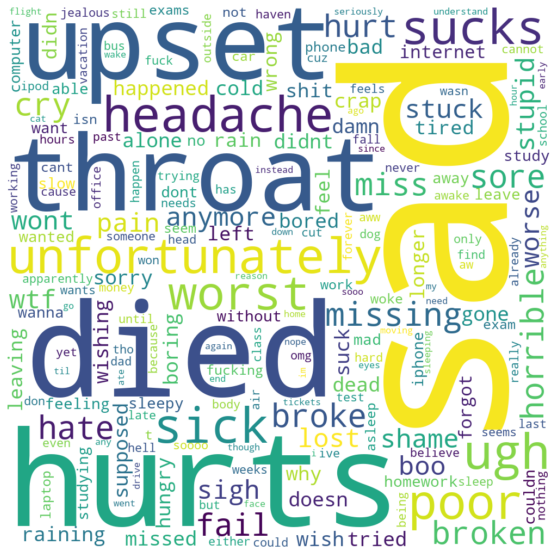

In [33]:
cloud(f['bad_pmi'][f['all']>500])

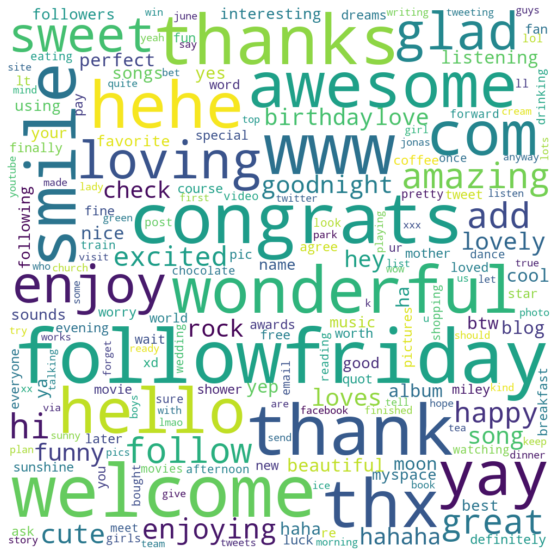

In [34]:
cloud(f['good_pmi'][f['all']>500])

In [35]:
newtrain

Target          Id                      DateTime      Flag  \
0       Positive  2060438657  Sat Jun 06 18:54:28 PDT 2009  NO_QUERY   
1       Positive  1971121571  Sat May 30 06:16:28 PDT 2009  NO_QUERY   
2       Negative  2056397190  Sat Jun 06 11:04:14 PDT 2009  NO_QUERY   
3       Negative  1468751242  Tue Apr 07 03:32:11 PDT 2009  NO_QUERY   
4       Negative  2237399225  Fri Jun 19 05:44:02 PDT 2009  NO_QUERY   
...          ...         ...                           ...       ...   
299995  Positive  2063288199  Sun Jun 07 02:03:50 PDT 2009  NO_QUERY   
299996  Negative  2234330630  Thu Jun 18 22:51:13 PDT 2009  NO_QUERY   
299997  Negative  1957138659  Thu May 28 23:37:34 PDT 2009  NO_QUERY   
299998  Negative  1980342765  Sun May 31 06:27:47 PDT 2009  NO_QUERY   
299999  Negative  2215192477  Wed Jun 17 17:48:19 PDT 2009  NO_QUERY   

                  User                                              Tweet  \
0            SissyHand            @thedesignergirl LOL! woohoo no crowds    
1        PaigeTJohnson                           @TherealGage  sweet deal   
2        tanzenmitgott  i's gettin' ready for a *party* and then work ...   
3           smallbecca  still feeling almost entirely overwhelmed by a...   
4       aliceintnsltwn  I have a Blogspot account! Visit http://alicei...   
...                ...                                                ...   
299995       jacquesvh       @__MissB haha ok just thought i would ask!!    
299996   JessieKaitlin  @Momsmostwanted I'm sending all my love to you...   
299997          HGhost            Feels like im going to cough up a lung    
299998    Rebekah_Anne  @Mollyworld sounds amazing. How did the yard s...   
299999      jencalsada      I miss my brother!!! He's been gone 4 a week    

                                               cleantweet  
0                                    LOL woohoo no crowds  
1                                              sweet deal  
2       i's gettin' ready for a party and then work to...  
3       still feeling almost entirely overwhelmed by a...  
4       I have a Blogspot account Visit Di pa kasi ako...  
...                                                   ...  
299995             MissB haha ok just thought i would ask  
299996  I'm sending all my love to your family I canno...  
299997             Feels like im going to cough up a lung  
299998  sounds amazing How did the yard sale go I want...  
299999          I miss my brother He's been gone 4 a week  

[299408 rows x 7 columns]

#### Lets split the data into train and test split. We will use an 80-20 split to achieve this

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
train, test = train_test_split(
    newtrain, test_size=0.2, stratify=newtrain["Target"], random_state=104
)

In [38]:
train = train.reset_index().drop('index',axis=1)

In [39]:
test = test.reset_index().drop('index',axis=1)

In [40]:
train.head()

Target          Id                      DateTime      Flag  \
0  Positive  1986946233  Sun May 31 19:33:17 PDT 2009  NO_QUERY   
1  Positive  1977460671  Sat May 30 21:01:20 PDT 2009  NO_QUERY   
2  Negative  1691852343  Sun May 03 18:44:51 PDT 2009  NO_QUERY   
3  Positive  2004477729  Tue Jun 02 08:15:45 PDT 2009  NO_QUERY   
4  Negative  1980738802  Sun May 31 07:32:54 PDT 2009  NO_QUERY   

              User                                              Tweet  \
0     CrissaCreena  @TiffanyLD OMG!!!  The way your worded that ma...   
1    Ninepinkbears                         @KatMcGraw awww thank you    
2  MichaellaBassam  WILL catch up on the hustler club. gahh i feel...   
3      TyraThatOne  #GoodSex Only Happens When Your With Me... Sor...   
4     ImTheNiceGuy  At work again wish I was back home in my bed  ...   

                                          cleantweet  
0  OMG The way your worded that made me laugh I b...  
1                                     awww thank you  
2  WILL catch up on the hustler club gahh i feel ...  
3  GoodSex Only Happens When Your With Me Sorry I...  
4  At work again wish I was back home in my bed d...

In [41]:
test.head()

Target          Id                      DateTime      Flag  \
0  Positive  2007560736  Tue Jun 02 12:49:13 PDT 2009  NO_QUERY   
1  Negative  1986023197  Sun May 31 18:12:01 PDT 2009  NO_QUERY   
2  Negative  2202200291  Tue Jun 16 21:24:05 PDT 2009  NO_QUERY   
3  Positive  1770617209  Mon May 11 21:48:11 PDT 2009  NO_QUERY   
4  Positive  1976108936  Sat May 30 16:36:17 PDT 2009  NO_QUERY   

             User                                              Tweet  \
0     dianastar88  Just filled up Seth's tank, again. Leaving ker...   
1         Colie_C  @Shebbago I would SO watch Notorious if I were...   
2    Socialite101  Back from LA well 85% back damn I'm in my Obey...   
3  authenticstyle                   @madure  - Sweet dreams to you!!   
4  FrenchFrye2012  So come on ge thigher loosen my lips faith and...   

                                          cleantweet  
0  Just filled up Seth's tank again Leaving kerrv...  
1      I would SO watch Notorious if I were with you  
2  Back from LA well 85 back damn I'm in my Obey ...  
3                                Sweet dreams to you  
4  So come on ge thigher loosen my lips faith and...

#### Now that we have finished the splits, we will fit a few baseline models and see how they perform with the data. 
#### We will try a few models, SGD, Random Forest, Ngram, Passive aggressive model as well the distilbert model to see which performs best with the data that we have. 

#### Lets first tokenize the data using Spacy

In [42]:
import spacy

nlp = spacy.load(
    "en_core_web_sm",
    exclude=["tagger", "parser", "ner", "lemmatizer", "attribute_ruler"],
)


def tokenize(text):
    doc = nlp.tokenizer(text)
    return [t.norm_ for t in doc if t.is_alpha]

In [43]:
train.iloc[1599]

Target                                                 Negative
Id                                                   2242627884
DateTime                           Fri Jun 19 12:25:44 PDT 2009
Flag                                                   NO_QUERY
User                                                holyschmoke
Tweet         @Bigbouncycastle just dm'd you the info from t...
cleantweet                 just dm'd you the info from the site
Name: 1599, dtype: object

In [44]:
train= train.dropna(axis=0, subset=['cleantweet'])
test = test.dropna(axis=0,subset=['cleantweet'])

#### Using all cores to process to make the process faster.

In [45]:
import multiprocessing as mp
with mp.Pool() as p:
    train["tokens"] = list(p.imap(tokenize, tqdm(train["cleantweet"]), chunksize=100))
    test["tokens"] = list(p.imap(tokenize, tqdm(test["cleantweet"]), chunksize=100))

  0%|          | 0/239526 [00:00<?, ?it/s]

  0%|          | 0/59882 [00:00<?, ?it/s]

In [46]:
train.head()

Target          Id                      DateTime      Flag  \
0  Positive  1986946233  Sun May 31 19:33:17 PDT 2009  NO_QUERY   
1  Positive  1977460671  Sat May 30 21:01:20 PDT 2009  NO_QUERY   
2  Negative  1691852343  Sun May 03 18:44:51 PDT 2009  NO_QUERY   
3  Positive  2004477729  Tue Jun 02 08:15:45 PDT 2009  NO_QUERY   
4  Negative  1980738802  Sun May 31 07:32:54 PDT 2009  NO_QUERY   

              User                                              Tweet  \
0     CrissaCreena  @TiffanyLD OMG!!!  The way your worded that ma...   
1    Ninepinkbears                         @KatMcGraw awww thank you    
2  MichaellaBassam  WILL catch up on the hustler club. gahh i feel...   
3      TyraThatOne  #GoodSex Only Happens When Your With Me... Sor...   
4     ImTheNiceGuy  At work again wish I was back home in my bed  ...   

                                          cleantweet  \
0  OMG The way your worded that made me laugh I b...   
1                                     awww thank you   
2  WILL catch up on the hustler club gahh i feel ...   
3  GoodSex Only Happens When Your With Me Sorry I...   
4  At work again wish I was back home in my bed d...   

                                              tokens  
0  [omg, the, way, your, worded, that, made, me, ...  
1                                 [awww, thank, you]  
2  [will, catch, up, on, the, hustler, club, gahh...  
3  [goodsex, only, happens, when, your, with, me,...  
4  [at, work, again, wish, i, was, back, home, in...

In [47]:
test.head()

Target          Id                      DateTime      Flag  \
0  Positive  2007560736  Tue Jun 02 12:49:13 PDT 2009  NO_QUERY   
1  Negative  1986023197  Sun May 31 18:12:01 PDT 2009  NO_QUERY   
2  Negative  2202200291  Tue Jun 16 21:24:05 PDT 2009  NO_QUERY   
3  Positive  1770617209  Mon May 11 21:48:11 PDT 2009  NO_QUERY   
4  Positive  1976108936  Sat May 30 16:36:17 PDT 2009  NO_QUERY   

             User                                              Tweet  \
0     dianastar88  Just filled up Seth's tank, again. Leaving ker...   
1         Colie_C  @Shebbago I would SO watch Notorious if I were...   
2    Socialite101  Back from LA well 85% back damn I'm in my Obey...   
3  authenticstyle                   @madure  - Sweet dreams to you!!   
4  FrenchFrye2012  So come on ge thigher loosen my lips faith and...   

                                          cleantweet  \
0  Just filled up Seth's tank again Leaving kerrv...   
1      I would SO watch Notorious if I were with you   
2  Back from LA well 85 back damn I'm in my Obey ...   
3                                Sweet dreams to you   
4  So come on ge thigher loosen my lips faith and...   

                                              tokens  
0  [just, filled, up, seth, tank, again, leaving,...  
1  [i, would, so, watch, notorious, if, i, were, ...  
2  [back, from, la, well, back, damn, i, in, my, ...  
3                           [sweet, dreams, to, you]  
4  [so, come, on, ge, thigher, loosen, my, lips, ...

#### SGD Classifier

In [85]:
import torch
device = torch.device("cuda")
torch.cuda.get_device_name(0)

'Tesla T4'

In [58]:
import mlflow
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import make_pipeline
from logger import log_search,log_test
from sklearn.feature_extraction.text import TfidfTransformer

In [76]:
sgd = make_pipeline(CountVectorizer(analyzer=identity), SGDClassifier())
sgd.fit(train["tokens"], train["Target"])
predicted = sgd.predict(test["tokens"])
print(classification_report(test["Target"], predicted))
mlflow.set_experiment("Project3_Models")
log_test(sgd, test["Target"], predicted)

              precision    recall  f1-score   support

    Negative       0.80      0.75      0.77     29930
    Positive       0.76      0.82      0.79     29942

    accuracy                           0.78     59872
   macro avg       0.78      0.78      0.78     59872
weighted avg       0.78      0.78      0.78     59872



#### NGramm Model

In [31]:
from nltk import bigrams
def unibigrams(toks):
    return [(tok,) for tok in toks] + list(bigrams(toks))

In [74]:
train

Target          Id                      DateTime      Flag  \
0       Negative  1823439024  Sat May 16 21:58:38 PDT 2009  NO_QUERY   
1       Positive  2063588922  Sun Jun 07 03:16:30 PDT 2009  NO_QUERY   
2       Positive  2071709965  Sun Jun 07 19:48:31 PDT 2009  NO_QUERY   
3       Negative  2031375990  Thu Jun 04 09:43:43 PDT 2009  NO_QUERY   
4       Positive  2013485079  Tue Jun 02 22:47:28 PDT 2009  NO_QUERY   
...          ...         ...                           ...       ...   
239995  Positive  2063758403  Sun Jun 07 03:57:51 PDT 2009  NO_QUERY   
239996  Positive  1968317806  Fri May 29 21:11:30 PDT 2009  NO_QUERY   
239997  Positive  1990212221  Mon Jun 01 04:13:23 PDT 2009  NO_QUERY   
239998  Positive  2045199412  Fri Jun 05 10:22:52 PDT 2009  NO_QUERY   
239999  Negative  2010406017  Tue Jun 02 17:19:47 PDT 2009  NO_QUERY   

                  User                                              Tweet  \
0          FateLiengod  @MissSTARcey  that and i hardly hear of a good...   
1             GratianB  @_J_A_M_E_S_ omg I have never heard of it! Tel...   
2           catoasapun  @Megmatthews20 Amen! He is the sweetest thing ...   
3        jennymesserly  @willbradley pure.life.style?  going to lake p...   
4              namasch                       getting a new haircut today    
...                ...                                                ...   
239995     Karen230683                              @Firequacker 45 mins    
239996  xoxomilliexoxo  back from my bestie's graduation and gonna rel...   
239997       jdsmith78  @RyanMorden oohh. Sorry. I'll photoshop that o...   
239998    BoudoirDivas  @danesanders... hope this week will work out! ...   
239999     robbycortez                                          is home.    

                                               cleantweet  \
0       that and i hardly hear of a good dj doing a gi...   
1       J A M E S omg I have never heard of it Tell me...   
2       Amen He is the sweetest thing when he wants to be   
3       pure life style going to lake pleasant camping...   
4                             getting a new haircut today   
...                                                   ...   
239995                                            45 mins   
239996  back from my bestie's graduation and gonna rel...   
239997            oohh Sorry I'll photoshop that out asap   
239998           hope this week will work out let us know   
239999                                            is home   

                                                   tokens  \
0       [that, and, i, hardly, hear, of, a, good, dj, ...   
1       [j, a, m, e, s, omg, i, have, never, heard, of...   
2       [amen, he, is, the, sweetest, thing, when, he,...   
3       [pure, life, style, going, to, lake, pleasant,...   
4                       [getting, a, new, haircut, today]   
...                                                   ...   
239995                                             [mins]   
239996  [back, from, my, bestie, graduation, and, goin...   
239997       [oohh, sorry, i, photoshop, that, out, asap]   
239998  [hope, this, week, will, work, out, let, us, k...   
239999                                         [is, home]   

                                                      doc  
0       (that, and, i, hardly, hear, of, a, good, dj, ...  
1       (J, A, M, E, S, omg, I, have, never, heard, of...  
2       (Amen, He, is, the, sweetest, thing, when, he,...  
3       (pure, life, style, going, to, lake, pleasant,...  
4                       (getting, a, new, haircut, today)  
...                                                   ...  
239995                                         (45, mins)  
239996  (back, from, my, bestie, 's, graduation, and, ...  
239997  (oohh, Sorry, I, 'll, photoshop, that, out, asap)  
239998  (hope, this, week, will, work, out, let, us, k...  
239999                                         (is, home)  

[239536 rows x 9 columns]

In [78]:
sgd = make_pipeline(CountVectorizer(analyzer=unibigrams), SGDClassifier())
sgd.fit(train["tokens"], train["Target"])
predicted = sgd.predict(test["tokens"])
print(classification_report(test["Target"], predicted))
mlflow.set_experiment("Project3_Models")
log_test(sgd, test["Target"], predicted)

              precision    recall  f1-score   support

    Negative       0.82      0.78      0.80     29930
    Positive       0.79      0.83      0.81     29942

    accuracy                           0.80     59872
   macro avg       0.80      0.80      0.80     59872
weighted avg       0.80      0.80      0.80     59872



#### Performs better than the baseline. Lets try a few other models

#### Passive Aggressive Model

In [79]:
from sklearn.linear_model import PassiveAggressiveClassifier
pac = make_pipeline(CountVectorizer(analyzer=identity),
                    TfidfTransformer(),
                   PassiveAggressiveClassifier(max_iter=10000, random_state=0,tol=1e-5))
pac.fit(train["tokens"], train["Target"])
predicted = pac.predict(test["tokens"])
print(classification_report(test["Target"], predicted))
mlflow.set_experiment("Project3_Models")
log_test(pac, test["Target"], predicted)

              precision    recall  f1-score   support

    Negative       0.75      0.72      0.73     29930
    Positive       0.73      0.76      0.74     29942

    accuracy                           0.74     59872
   macro avg       0.74      0.74      0.74     59872
weighted avg       0.74      0.74      0.74     59872



#### Worse than the other two. Lets try a Random Forest Classifier.

In [80]:
from sklearn.ensemble import RandomForestClassifier

In [82]:
rf = make_pipeline(CountVectorizer(analyzer=identity),
                   RandomForestClassifier(random_state=0))
rf.fit(train["tokens"], train["Target"])
predicted = rf.predict(test["tokens"])
print(classification_report(test["Target"], predicted))
mlflow.set_experiment("Project3_Models")
log_test(rf, test["Target"], predicted)

              precision    recall  f1-score   support

    Negative       0.76      0.81      0.78     29930
    Positive       0.80      0.75      0.77     29942

    accuracy                           0.78     59872
   macro avg       0.78      0.78      0.78     59872
weighted avg       0.78      0.78      0.78     59872



#### First we will go with the Ngram SGD Model, which is the best performing linear model. We will hyperparameter tune it and try a few different methods to improve its prediction capability.
#### Once we arrive at a model that performs best, we will train a distilbert neural net model and see if we can get it to perform better only on hyperparameter tuning.

In [29]:
from dask.distributed import Client

client = Client("tcp://127.0.0.1:38093")
client

<Client: 'tcp://127.0.0.1:38093' processes=4 threads=4, memory=16.51 GB>

In [30]:
import mlflow
from dask_ml.model_selection import RandomizedSearchCV
from logger import log_search,log_test
from scipy.stats.distributions import loguniform, randint, uniform
from warnings import simplefilter

simplefilter(action="ignore", category=FutureWarning)

In [34]:
mlflow.set_experiment("Project3_Sentiment")
sgd = make_pipeline(
    CountVectorizer(analyzer=unibigrams), TfidfTransformer(), SGDClassifier()
)

INFO: 'Project3_Sentiment' does not exist. Creating a new experiment


#### Hyperparameter tuning: First iteration

In [35]:
%%time

search = RandomizedSearchCV(
    sgd,
    {
        "countvectorizer__min_df": randint(1, 20),
        "countvectorizer__max_df": uniform(0.5, 0.5),
        "tfidftransformer__use_idf": [True, False],
        "sgdclassifier__alpha": loguniform(1e-6, 1e-2),
    },
    n_iter=50,
    scoring="f1_macro",
)
search.fit(train["tokens"], train["Target"])
log_search(search)

CPU times: user 6 s, sys: 815 ms, total: 6.81 s
Wall time: 9min 7s


#### Second Iteration

In [37]:
%%time

search = RandomizedSearchCV(
    sgd,
    {
        "countvectorizer__min_df": [1],
        "countvectorizer__max_df": [0.7],
        "tfidftransformer__use_idf": [False],
        "sgdclassifier__alpha": loguniform(1e-10, 1e-6),
    },
    n_iter=50,
    scoring="f1_macro",
)
search.fit(train["tokens"], train["Target"])
log_search(search)

CPU times: user 6.15 s, sys: 897 ms, total: 7.05 s
Wall time: 11min 50s


#### Optimised Model

In [39]:
sgd = make_pipeline(
    CountVectorizer(analyzer=unibigrams, min_df=1, max_df=0.7),TfidfTransformer(use_idf=False), SGDClassifier(alpha=5e-6)
)
sgd.fit(train["tokens"], train["Target"])
predicted = sgd.predict(test["tokens"])
print(classification_report(test["Target"], predicted))
mlflow.set_experiment("Project3_Models")
log_test(sgd, test["Target"], predicted)

              precision    recall  f1-score   support

    Negative       0.81      0.80      0.81     29930
    Positive       0.80      0.81      0.81     29942

    accuracy                           0.81     59872
   macro avg       0.81      0.81      0.81     59872
weighted avg       0.81      0.81      0.81     59872



#### Marginal Improvements allround. Lets check out the performance of the different models

In [40]:
models = pd.read_csv('ModelPerformance.csv')

In [56]:
models[['Name','f1']].sort_values(by='f1',ascending=False)

Name        f1
0     Optimised Ngram  0.806281
3     Ngramm Baseline  0.801524
4        SGD Baseline  0.779827
1       Random Forest  0.778118
2  Passive Aggressive  0.738672

#### Clear to see the optimised Ngram performs the best, with an F1 of 0.81. Lets move on 

In [65]:
import cloudpickle

In [59]:
cloudpickle.dump(sgd, open("sgd.model", "wb"))

#### Lets add negations to the document and see if that will improve performance

##### Parsing the texts

In [48]:
import spacy
from spacy.tokens import DocBin

nlp = spacy.load("en_core_web_sm", exclude=["ner"])

In [49]:
train.head()

Target          Id                      DateTime      Flag  \
0  Positive  1986946233  Sun May 31 19:33:17 PDT 2009  NO_QUERY   
1  Positive  1977460671  Sat May 30 21:01:20 PDT 2009  NO_QUERY   
2  Negative  1691852343  Sun May 03 18:44:51 PDT 2009  NO_QUERY   
3  Positive  2004477729  Tue Jun 02 08:15:45 PDT 2009  NO_QUERY   
4  Negative  1980738802  Sun May 31 07:32:54 PDT 2009  NO_QUERY   

              User                                              Tweet  \
0     CrissaCreena  @TiffanyLD OMG!!!  The way your worded that ma...   
1    Ninepinkbears                         @KatMcGraw awww thank you    
2  MichaellaBassam  WILL catch up on the hustler club. gahh i feel...   
3      TyraThatOne  #GoodSex Only Happens When Your With Me... Sor...   
4     ImTheNiceGuy  At work again wish I was back home in my bed  ...   

                                          cleantweet  \
0  OMG The way your worded that made me laugh I b...   
1                                     awww thank you   
2  WILL catch up on the hustler club gahh i feel ...   
3  GoodSex Only Happens When Your With Me Sorry I...   
4  At work again wish I was back home in my bed d...   

                                              tokens  
0  [omg, the, way, your, worded, that, made, me, ...  
1                                 [awww, thank, you]  
2  [will, catch, up, on, the, hustler, club, gahh...  
3  [goodsex, only, happens, when, your, with, me,...  
4  [at, work, again, wish, i, was, back, home, in...

In [50]:
docstrain = DocBin(docs=nlp.pipe(tqdm(train['cleantweet']), n_process=6))

  0%|          | 0/239526 [00:00<?, ?it/s]

In [51]:
docstest = DocBin(docs=nlp.pipe(tqdm(test['cleantweet']), n_process=6))

  0%|          | 0/59882 [00:00<?, ?it/s]

In [52]:
train['doc'] = list(docstrain.get_docs(nlp.vocab))
test['doc'] = list(docstest.get_docs(nlp.vocab))

In [53]:
from spacy.tokens import Token
Token.set_extension('neg', default=False,force=True)

In [54]:
def add_neg(token):
    return 'NOT:'+token.norm_ if token._.neg else token.norm_

In [55]:
def print_top_feats(M, k=0):
    V = M.named_steps['countvectorizer'].get_feature_names()
    coef = M.named_steps['sgdclassifier'].coef_[0]
    order = coef.argsort()
    for w1, w2 in zip(order[-k:][::-1],order[:k]):
        print(f'{V[w1]:20s} {coef[w1]:7.3f} | {V[w2]:20s} {coef[w2]:7.3f}')

#### Negation

In [56]:
def mod_tokenizer(doc):
    return [ add_neg(w.head) + '_' + add_neg(w) for w in doc 
            if w.dep_ in ['amod', 'advmod'] ] + \
            [ add_neg(w) for w in doc]

In [59]:
negmod = make_pipeline(CountVectorizer(preprocessor=identity, tokenizer=mod_tokenizer,min_df = 1,max_df=0.7),
                   TfidfTransformer(use_idf=False),
                   SGDClassifier(alpha=5e-6))
negmod.fit(train['doc'], train['Target'])
negmod.score(test['doc'], test['Target'])

0.7979025416652751

In [60]:
print_top_feats(negmod, 15)

worry                  4.607 | sad                   -7.421
worries                4.427 | poor                  -6.508
wait                   4.256 | miss                  -6.053
proud                  3.804 | sucks                 -5.704
smiling                3.771 | sadly                 -5.672
glad                   3.634 | unfortunately         -5.606
smile                  3.415 | disappointed          -5.591
thanks                 3.410 | missing               -5.555
working_hard           3.340 | died                  -5.095
thankyou               3.298 | gutted                -5.060
yayy                   3.266 | bummer                -5.030
welcome                3.203 | shame                 -5.009
cute                   3.166 | broke                 -4.838
hehehe                 3.157 | sick                  -4.756
hehe                   3.126 | bummed                -4.742


In [61]:
def everything(doc):
    return [ add_neg(w.head) + '_' + add_neg(w) for w in doc ] + \
            [ add_neg(w) for w in doc]

In [62]:
everymod = make_pipeline(CountVectorizer(preprocessor=identity, tokenizer=everything,min_df = 1,max_df= 0.7),
                   TfidfTransformer(use_idf=False),
                   SGDClassifier(alpha=5e-6))
everymod.fit(train['doc'], train['Target'])
everymod.score(test['doc'], test['Target'])

0.8090578137002772

In [63]:
print_top_feats(everymod, 15)

bad_not                6.738 | sad                   -8.318
problem_no             4.545 | poor                  -6.941
thanks                 4.057 | unfortunately         -6.249
wait_not               3.815 | missing               -5.860
glad                   3.722 | sadly                 -5.735
wait_can               3.672 | sick                  -5.566
yay                    3.628 | sucks                 -5.528
wish_luck              3.591 | missed                -5.383
miss_not               3.574 | worst                 -5.260
excited                3.559 | disappointed          -5.229
worries_no             3.412 | wish                  -5.165
proud                  3.388 | shame                 -5.066
prob_no                3.375 | bummer                -5.033
hehe                   3.331 | ugh                   -4.975
need_no                3.331 | rip                   -4.891


#### Negations dont really help because there is no way to combine them with the bigrams model, and on their own they perform worse than a tuned bigrams model. But it is good to see in terms of explanations of models to see how connotations of words and contextual clues in sentences can change meanings of certain positive or negative sounding words.
#### But the word combinations in sentences seems to do a really good job because it performs just as well as the tuned bigrams model. Words like No combined with a negative word like problem or worries scores high on the score of features.

___________

#### Improving model performance using margin calculations

In [66]:
sgd = cloudpickle.load(open('sgd.model','rb'))

In [67]:
sgd.fit(train["tokens"], train["Target"])

Pipeline(steps=[('countvectorizer',
                 CountVectorizer(analyzer=<function unibigrams at 0x7f89c67f4ca0>,
                                 max_df=0.7)),
                ('tfidftransformer', TfidfTransformer(use_idf=False)),
                ('sgdclassifier', SGDClassifier(alpha=5e-06))])

In [68]:
predicted = sgd.predict(test["tokens"])
print(classification_report(test["Target"], predicted))

              precision    recall  f1-score   support

    Negative       0.80      0.82      0.81     29930
    Positive       0.82      0.80      0.81     29952

    accuracy                           0.81     59882
   macro avg       0.81      0.81      0.81     59882
weighted avg       0.81      0.81      0.81     59882



In [69]:
labels = sgd.named_steps['sgdclassifier'].classes_
scores = sgd.decision_function(test["cleantweet"])

In [70]:
coef = sgd.named_steps['sgdclassifier'].coef_

In [71]:
labels,scores

(array(['Negative', 'Positive'], dtype='<U8'),
 array([-0.21161553, -0.21836522, -0.16905901, ..., -0.34215722,
         0.25718418, -0.50513825]))

#### Since there are only one score for each class, making a margin calculation might not be feasible. Lets try and see if we can see a threshold anyway.

In [72]:
test[test.Target=='Positive']

Target          Id                      DateTime      Flag  \
0      Positive  2007560736  Tue Jun 02 12:49:13 PDT 2009  NO_QUERY   
3      Positive  1770617209  Mon May 11 21:48:11 PDT 2009  NO_QUERY   
4      Positive  1976108936  Sat May 30 16:36:17 PDT 2009  NO_QUERY   
7      Positive  2187902185  Mon Jun 15 20:59:04 PDT 2009  NO_QUERY   
8      Positive  1993862383  Mon Jun 01 11:02:46 PDT 2009  NO_QUERY   
...         ...         ...                           ...       ...   
59871  Positive  2014307770  Wed Jun 03 01:06:01 PDT 2009  NO_QUERY   
59877  Positive  2051514419  Fri Jun 05 22:12:41 PDT 2009  NO_QUERY   
59878  Positive  1979952812  Sun May 31 05:09:03 PDT 2009  NO_QUERY   
59880  Positive  1977545479  Sat May 30 21:11:21 PDT 2009  NO_QUERY   
59881  Positive  1879952636  Thu May 21 23:38:13 PDT 2009  NO_QUERY   

                  User                                              Tweet  \
0          dianastar88  Just filled up Seth's tank, again. Leaving ker...   
3       authenticstyle                   @madure  - Sweet dreams to you!!   
4       FrenchFrye2012  So come on ge thigher loosen my lips faith and...   
7           AdamBMusic  Vote for Goodbye, You Suck by Shiloh to win an...   
8            Sassykinn                                  @TimElmo finally    
...                ...                                                ...   
59871      andrewhelms  @jerusha Fair enough, I feel that conservs. ar...   
59877  EvangelineAdams                           just wrote a new song.     
59878         schnille  @henryandfriends Thanks again Henry, have a ni...   
59880        Car_leigh                         @peace_love96 I love you!    
59881        davidatsg  @jeremi not really... they don't need such pub...   

                                              cleantweet  \
0      Just filled up Seth's tank again Leaving kerrv...   
3                                    Sweet dreams to you   
4      So come on ge thigher loosen my lips faith and...   
7      Vote for Goodbye You Suck by Shiloh to win an ...   
8                                                finally   
...                                                  ...   
59871  Fair enough I feel that conservs are getting r...   
59877                              just wrote a new song   
59878              Thanks again Henry have a nice Sunday   
59880                                  love96 I love you   
59881  not really they don't need such publicity i guess   

                                                  tokens  \
0      [just, filled, up, seth, tank, again, leaving,...   
3                               [sweet, dreams, to, you]   
4      [so, come, on, ge, thigher, loosen, my, lips, ...   
7      [vote, for, goodbye, you, suck, by, shiloh, to...   
8                                              [finally]   
...                                                  ...   
59871  [fair, enough, i, feel, that, conservs, are, g...   
59877                        [just, wrote, a, new, song]   
59878      [thanks, again, henry, have, a, nice, sunday]   
59880                                     [i, love, you]   
59881  [not, really, they, do, need, such, publicity,...   

                                                     doc  
0      (Just, filled, up, Seth, 's, tank, again, Leav...  
3                               (Sweet, dreams, to, you)  
4      (So, come, on, ge, thigher, loosen, my, lips, ...  
7      (Vote, for, Goodbye, You, Suck, by, Shiloh, to...  
8                                              (finally)  
...                                                  ...  
59871  (Fair, enough, I, feel, that, conservs, are, g...  
59877                        (just, wrote, a, new, song)  
59878      (Thanks, again, Henry, have, a, nice, Sunday)  
59880                             (love96, I, love, you)  
59881  (not, really, they, do, n't, need, such, publi...  

[29952 rows x 9 columns]

In [73]:
test.cleantweet[59862],test.cleantweet[3]

("survived the danskin i'm so lucky to have such a strong support group now for an afternoon of rest and relaxation",
 'Sweet dreams to you')

In [74]:
scores[59862],scores[3]

(-0.15332568702372684, 0.1591547146033523)

#### With two positive tweets having widely differing margins it might be hard to make a margin threshold that will do a good job. Lets try this on the negative tweets.

In [75]:
test[test.Target=='Negative']

Target          Id                      DateTime      Flag  \
1      Negative  1986023197  Sun May 31 18:12:01 PDT 2009  NO_QUERY   
2      Negative  2202200291  Tue Jun 16 21:24:05 PDT 2009  NO_QUERY   
5      Negative  2064913991  Sun Jun 07 07:28:20 PDT 2009  NO_QUERY   
6      Negative  2064865664  Sun Jun 07 07:21:33 PDT 2009  NO_QUERY   
16     Negative  2053385432  Sat Jun 06 04:21:57 PDT 2009  NO_QUERY   
...         ...         ...                           ...       ...   
59873  Negative  1986294338  Sun May 31 18:37:42 PDT 2009  NO_QUERY   
59874  Negative  2265227808  Sun Jun 21 06:05:50 PDT 2009  NO_QUERY   
59875  Negative  2206303256  Wed Jun 17 06:20:00 PDT 2009  NO_QUERY   
59876  Negative  2204091283  Wed Jun 17 01:18:04 PDT 2009  NO_QUERY   
59879  Negative  2240460278  Fri Jun 19 09:46:21 PDT 2009  NO_QUERY   

                  User                                              Tweet  \
1              Colie_C  @Shebbago I would SO watch Notorious if I were...   
2         Socialite101  Back from LA well 85% back damn I'm in my Obey...   
5      quicksilverjack  just back from the shops, food and camping gea...   
6         kiera_baybee  so bored  need to go find some1 to go fer a dr...   
16        xxEmziilouxx          watchin hsm2 as 4got the sky password  ..   
...                ...                                                ...   
59873        dahrobbie                         @togreat_heights lmfao no    
59874    MissJustice71                                feeling lonely ...    
59875         clare666  I've told him 2 make a formal complaint but co...   
59876            owieh  @Denise2779 works fine on my phone... but i ca...   
59879     thesims2_dex  I want @tommcfly 's reply! I'm sad! Please lov...   

                                              cleantweet  \
1          I would SO watch Notorious if I were with you   
2      Back from LA well 85 back damn I'm in my Obey ...   
5      just back from the shops food and camping gear...   
6      so bored need to go find some1 to go fer a dri...   
16                 watchin hsm2 as 4got the sky password   
...                                                  ...   
59873                                   heights lmfao no   
59874                                     feeling lonely   
59875  I've told him 2 make a formal complaint but co...   
59876  works fine on my phone but i cant get the desk...   
59879  I want 's reply I'm sad Please love Reply me I...   

                                                  tokens  \
1      [i, would, so, watch, notorious, if, i, were, ...   
2      [back, from, la, well, back, damn, i, in, my, ...   
5      [just, back, from, the, shops, food, and, camp...   
6      [so, bored, need, to, go, find, to, go, fer, a...   
16                     [watchin, as, the, sky, password]   
...                                                  ...   
59873                               [heights, lmfao, no]   
59874                                  [feeling, lonely]   
59875  [i, told, him, make, a, formal, complaint, but...   
59876  [works, fine, on, my, phone, but, i, can, not,...   
59879  [i, want, reply, i, sad, please, love, reply, ...   

                                                     doc  
1      (I, would, SO, watch, Notorious, if, I, were, ...  
2      (Back, from, LA, well, 85, back, damn, I, 'm, ...  
5      (just, back, from, the, shops, food, and, camp...  
6      (so, bored, need, to, go, find, some1, to, go,...  
16         (watchin, hsm2, as, 4got, the, sky, password)  
...                                                  ...  
59873                               (heights, lmfao, no)  
59874                                  (feeling, lonely)  
59875  (I, 've, told, him, 2, make, a, formal, compla...  
59876  (works, fine, on, my, phone, but, i, ca, nt, g...  
59879  (I, want, 's, reply, I, 'm, sad, Please, love,...  

[29930 rows x 9 columns]

In [76]:
test.cleantweet[5],test.cleantweet[59867]

("just back from the shops food and camping gear for the missus she's off to Glasto I'm not",
 'Hope everyone is having a SWELL day')

In [77]:
scores[5],scores[59867]

(-0.15518378084809514, -0.4776238610928423)

#### Clear to see there is no clear margin values that we can make a threshold out of. Cannot use this to make the model better. 

#### With no way to make the model any better, the best score we got out of the SGD classifier was 0.81. Lets train a distilbert model and see if that can do better.

In [78]:
import time
from collections import Counter

import torch
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from torch import nn
from torch.utils.data import DataLoader
from torchtext.vocab import Vocab

In [79]:
def collate_batch(batch):
    labels, texts = zip(*batch)
    (inputs,) = (
        tokenizer(list(texts), truncation=True, padding=True, return_tensors="pt"),
    )
    labels = torch.tensor([label_vocab[l] for l in labels], dtype=torch.int64)
    return labels, inputs["input_ids"], inputs["attention_mask"]

In [80]:
def decision_function(dataloader):
    model.eval()
    with torch.no_grad():
        with torch.cuda.amp.autocast(enabled=True):
            results = []
            for _, input_ids, attention_mask in dataloader:
                input_ids = input_ids.to(device)
                attention_mask = attention_mask.to(device)
                outputs = model(input_ids, attention_mask).logits
                results.extend(outputs)
                # print (results)
    return results


def predict(dataloader):
    predicted = decision_function(dataloader)
    return [label_vocab.itos[p.argmax()] for p in predicted]

In [81]:
def fit(
    epochs=5,
    batch_size=64,
    wd=None,
):
    optimizer = torch.optim.AdamW(model.parameters(), lr=5e-5)
    scaler = torch.cuda.amp.GradScaler(enabled=True)

    train_dataset = list(zip(train["Target"], train["cleantweet"]))
    train_dataloader = DataLoader(
        train_dataset,
        batch_size=batch_size,
        shuffle=True,
        collate_fn=collate_batch,
    )

    for epoch in range(1, epochs + 1):

        start = time.time()

        model.train()
        correct = 0
        for labels, input_ids, attention_mask in tqdm(train_dataloader):
            optimizer.zero_grad()
            with torch.cuda.amp.autocast(enabled=True):
                input_ids = input_ids.to(device)
                attention_mask = attention_mask.to(device)
                labels = labels.to(device)
                outputs = model(
                    input_ids=input_ids, attention_mask=attention_mask, labels=labels
                )
                loss = outputs[0]
            scaler.scale(loss).backward()
            scaler.step(optimizer)
            scaler.update()

    elapsed = time.time() - start
    print(f"Epoch: {epoch:2d} Time: {elapsed:6.2f}s")

In [82]:
from transformers import DistilBertForSequenceClassification, DistilBertTokenizerFast

In [83]:
tokenizer = DistilBertTokenizerFast.from_pretrained("distilbert-base-uncased")
label_vocab = Vocab(Counter(train["Target"]), specials=[])

In [86]:
model = DistilBertForSequenceClassification.from_pretrained(
    "distilbert-base-uncased", num_labels=len(label_vocab)
).to(device)

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_transform.weight', 'vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_layer_norm.bias', 'vocab_projector.weight', 'vocab_projector.bias']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classi

In [87]:
fit(epochs=2, batch_size=64)

test_dataset = list(zip(test["Target"], test["cleantweet"]))
test_dataloader = DataLoader(
    test_dataset, batch_size=4, shuffle=False, collate_fn=collate_batch
)
test_predicted = predict(tqdm(test_dataloader))
acc = 100 * accuracy_score(test["Target"], test_predicted)
f1 = 100 * f1_score(test["Target"], test_predicted, average="macro")
print(f"Accuracy = {acc:.3f} F1 = {f1:.3f}")

  0%|          | 0/3743 [00:00<?, ?it/s]

  0%|          | 0/3743 [00:00<?, ?it/s]

Epoch:  2 Time: 323.73s


  0%|          | 0/14971 [00:00<?, ?it/s]

Accuracy = 83.833 F1 = 83.812


In [88]:
model.save_pretrained("distilbert.1")
tokenizer.save_pretrained("distilbert.1")

('distilbert.1/tokenizer_config.json',
 'distilbert.1/special_tokens_map.json',
 'distilbert.1/vocab.txt',
 'distilbert.1/added_tokens.json')

#### Lets test out a few other values for epochs and batch size

In [110]:
model = DistilBertForSequenceClassification.from_pretrained(
    "distilbert-base-uncased", num_labels=len(label_vocab)
).to(device)

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_transform.weight', 'vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_layer_norm.bias', 'vocab_projector.weight', 'vocab_projector.bias']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classi

In [111]:
fit(epochs=2, batch_size=32)

  0%|          | 0/7486 [00:00<?, ?it/s]

  0%|          | 0/7486 [00:00<?, ?it/s]

Epoch:  2 Time: 473.96s


In [47]:
test_predicted = predict(tqdm(test_dataloader))
acc = 100 * accuracy_score(test["Target"], test_predicted)
f1 = 100 * f1_score(test["Target"], test_predicted, average="macro")
print(f"Accuracy = {acc:.3f} F1 = {f1:.3f}")

  0%|          | 0/14968 [00:00<?, ?it/s]

Accuracy = 82.914 F1 = 82.907


In [114]:
model = DistilBertForSequenceClassification.from_pretrained(
    "distilbert-base-uncased", num_labels=len(label_vocab)
).to(device)

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_transform.weight', 'vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_layer_norm.bias', 'vocab_projector.weight', 'vocab_projector.bias']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classi

In [115]:
fit(epochs=1, batch_size=16)
fit(epochs=1, batch_size=16)

  0%|          | 0/14971 [00:00<?, ?it/s]

Epoch:  1 Time: 773.64s


  0%|          | 0/14971 [00:00<?, ?it/s]

Epoch:  1 Time: 775.25s


In [116]:
test_predicted = predict(tqdm(test_dataloader))
acc = 100 * accuracy_score(test["Target"], test_predicted)
f1 = 100 * f1_score(test["Target"], test_predicted, average="macro")
print(f"Accuracy = {acc:.3f} F1 = {f1:.3f}")

  0%|          | 0/14968 [00:00<?, ?it/s]

Accuracy = 82.914 F1 = 82.907


#### The BERT model with 2 epochs and 64 batch size got upto 84% accuracy. We will use LIME to explain the model and how it makes its classification.

In [89]:
from transformers import DistilBertForSequenceClassification, DistilBertTokenizerFast

In [90]:
def collate_batch(batch):
    labels, texts = zip(*batch)
    inputs,  = tokenizer(list(texts), truncation=True, padding=True, return_tensors='pt'),
    #labels = torch.tensor([label_vocab[l] for l in labels], dtype=torch.int64)
    return labels, inputs['input_ids'], inputs['attention_mask']

In [91]:
def decision_function(dataloader):
    model.eval()
    with torch.no_grad():
        with torch.cuda.amp.autocast(enabled=True):
            results = [ ]
            for _, input_ids, attention_mask in dataloader:
                input_ids = input_ids.to(device)
                attention_mask = attention_mask.to(device)
                outputs = model(input_ids, attention_mask).logits
                results.extend(outputs)
    return results

def predict(dataloader):
    predicted = decision_function(dataloader)
    return [label_vocab.itos[p.argmax()] for p in predicted]

In [92]:
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert.1')
label_vocab = Vocab(Counter(train["Target"]), specials=[])

In [93]:
from lime.lime_text import LimeTextExplainer

In [94]:
explainer = LimeTextExplainer(class_names=label_vocab.itos)

In [95]:
def decision(texts):
    dataset = [("good", t) for t in texts]
    dataloader = DataLoader(
        dataset, batch_size=4, shuffle=False, collate_fn=collate_batch
    )
    return torch.vstack(decision_function(dataloader)).to("cpu").numpy()

def explain(text):
    exp = explainer.explain_instance(text, decision, num_features=10, labels=[0,1])
    exp.show_in_notebook()

In [96]:
test_dataset = list(zip(test["Target"], test["cleantweet"]))
test_dataloader = DataLoader(
    test_dataset, batch_size=4, shuffle=False, collate_fn=collate_batch
)

In [97]:
test[test_predicted==test["Target"]]

Target          Id                      DateTime      Flag  \
1      Negative  1986023197  Sun May 31 18:12:01 PDT 2009  NO_QUERY   
2      Negative  2202200291  Tue Jun 16 21:24:05 PDT 2009  NO_QUERY   
3      Positive  1770617209  Mon May 11 21:48:11 PDT 2009  NO_QUERY   
4      Positive  1976108936  Sat May 30 16:36:17 PDT 2009  NO_QUERY   
5      Negative  2064913991  Sun Jun 07 07:28:20 PDT 2009  NO_QUERY   
...         ...         ...                           ...       ...   
59876  Negative  2204091283  Wed Jun 17 01:18:04 PDT 2009  NO_QUERY   
59877  Positive  2051514419  Fri Jun 05 22:12:41 PDT 2009  NO_QUERY   
59878  Positive  1979952812  Sun May 31 05:09:03 PDT 2009  NO_QUERY   
59879  Negative  2240460278  Fri Jun 19 09:46:21 PDT 2009  NO_QUERY   
59880  Positive  1977545479  Sat May 30 21:11:21 PDT 2009  NO_QUERY   

                  User                                              Tweet  \
1              Colie_C  @Shebbago I would SO watch Notorious if I were...   
2         Socialite101  Back from LA well 85% back damn I'm in my Obey...   
3       authenticstyle                   @madure  - Sweet dreams to you!!   
4       FrenchFrye2012  So come on ge thigher loosen my lips faith and...   
5      quicksilverjack  just back from the shops, food and camping gea...   
...                ...                                                ...   
59876            owieh  @Denise2779 works fine on my phone... but i ca...   
59877  EvangelineAdams                           just wrote a new song.     
59878         schnille  @henryandfriends Thanks again Henry, have a ni...   
59879     thesims2_dex  I want @tommcfly 's reply! I'm sad! Please lov...   
59880        Car_leigh                         @peace_love96 I love you!    

                                              cleantweet  \
1          I would SO watch Notorious if I were with you   
2      Back from LA well 85 back damn I'm in my Obey ...   
3                                    Sweet dreams to you   
4      So come on ge thigher loosen my lips faith and...   
5      just back from the shops food and camping gear...   
...                                                  ...   
59876  works fine on my phone but i cant get the desk...   
59877                              just wrote a new song   
59878              Thanks again Henry have a nice Sunday   
59879  I want 's reply I'm sad Please love Reply me I...   
59880                                  love96 I love you   

                                                  tokens  \
1      [i, would, so, watch, notorious, if, i, were, ...   
2      [back, from, la, well, back, damn, i, in, my, ...   
3                               [sweet, dreams, to, you]   
4      [so, come, on, ge, thigher, loosen, my, lips, ...   
5      [just, back, from, the, shops, food, and, camp...   
...                                                  ...   
59876  [works, fine, on, my, phone, but, i, can, not,...   
59877                        [just, wrote, a, new, song]   
59878      [thanks, again, henry, have, a, nice, sunday]   
59879  [i, want, reply, i, sad, please, love, reply, ...   
59880                                     [i, love, you]   

                                                     doc  
1      (I, would, SO, watch, Notorious, if, I, were, ...  
2      (Back, from, LA, well, 85, back, damn, I, 'm, ...  
3                               (Sweet, dreams, to, you)  
4      (So, come, on, ge, thigher, loosen, my, lips, ...  
5      (just, back, from, the, shops, food, and, camp...  
...                                                  ...  
59876  (works, fine, on, my, phone, but, i, ca, nt, g...  
59877                        (just, wrote, a, new, song)  
59878      (Thanks, again, Henry, have, a, nice, Sunday)  
59879  (I, want, 's, reply, I, 'm, sad, Please, love,...  
59880                             (love96, I, love, you)  

[50201 rows x 9 columns]

#### Explaining some of the examples we got right

#### Positive example 

In [98]:
test.cleantweet.iloc[3]

'Sweet dreams to you'

In [99]:
model = DistilBertForSequenceClassification.from_pretrained(
    "distilbert.1", num_labels=len(label_vocab)
).to(device)

In [100]:
explain(test.cleantweet.iloc[3])

#### Negative Example

In [103]:
test.cleantweet.loc[59879]

"I want 's reply I'm sad Please love Reply me I'm so sad today almost crying By mandy ggt"

In [105]:
explain(test.cleantweet.loc[59879])

#### Explaining some of the classifications we got wrong

In [106]:
test[test_predicted!=test["Target"]]

Target          Id                      DateTime      Flag  \
0      Positive  2007560736  Tue Jun 02 12:49:13 PDT 2009  NO_QUERY   
17     Positive  1980898530  Sun May 31 07:57:01 PDT 2009  NO_QUERY   
18     Negative  2235105061  Fri Jun 19 00:26:18 PDT 2009  NO_QUERY   
28     Positive  2055011806  Sat Jun 06 08:31:41 PDT 2009  NO_QUERY   
38     Positive  2062774729  Sun Jun 07 00:15:22 PDT 2009  NO_QUERY   
...         ...         ...                           ...       ...   
59866  Negative  2252832380  Sat Jun 20 07:05:01 PDT 2009  NO_QUERY   
59868  Positive  1961485501  Fri May 29 09:34:33 PDT 2009  NO_QUERY   
59871  Positive  2014307770  Wed Jun 03 01:06:01 PDT 2009  NO_QUERY   
59873  Negative  1986294338  Sun May 31 18:37:42 PDT 2009  NO_QUERY   
59881  Positive  1879952636  Thu May 21 23:38:13 PDT 2009  NO_QUERY   

                 User                                              Tweet  \
0         dianastar88  Just filled up Seth's tank, again. Leaving ker...   
17           alexmace  @happygeek I'll do it, but you're not followin...   
18         sarah29457  @PalmettoGoddess  Hope you're able to catch up...   
28     jonathanjadams  Filling in my driving license application form...   
38            iToasti  yesterday was great!  tomorrow school again =(...   
...               ...                                                ...   
59866           Rammi  @shinyshiny's new Twitter profile picture scar...   
59868          zigged  Not participating in the #3wordsaftersex trend...   
59871     andrewhelms  @jerusha Fair enough, I feel that conservs. ar...   
59873       dahrobbie                         @togreat_heights lmfao no    
59881       davidatsg  @jeremi not really... they don't need such pub...   

                                              cleantweet  \
0      Just filled up Seth's tank again Leaving kerrv...   
17     I'll do it but you're not following me so I ca...   
18            Hope you're able to catch up on sleep soon   
28     Filling in my driving license application form...   
38     yesterday was great tomorrow school again tues...   
...                                                  ...   
59866  's new Twitter profile picture scares me hides...   
59868  Not participating in the 3wordsaftersex trend ...   
59871  Fair enough I feel that conservs are getting r...   
59873                                   heights lmfao no   
59881  not really they don't need such publicity i guess   

                                                  tokens  \
0      [just, filled, up, seth, tank, again, leaving,...   
17     [i, do, it, but, you, not, following, me, so, ...   
18     [hope, you, able, to, catch, up, on, sleep, soon]   
28     [filling, in, my, driving, license, applicatio...   
38     [yesterday, was, great, tomorrow, school, agai...   
...                                                  ...   
59866  [new, twitter, profile, picture, scares, me, h...   
59868  [not, participating, in, the, trend, so, as, t...   
59871  [fair, enough, i, feel, that, conservs, are, g...   
59873                               [heights, lmfao, no]   
59881  [not, really, they, do, need, such, publicity,...   

                                                     doc  
0      (Just, filled, up, Seth, 's, tank, again, Leav...  
17     (I, 'll, do, it, but, you, 're, not, following...  
18     (Hope, you, 're, able, to, catch, up, on, slee...  
28     (Filling, in, my, driving, license, applicatio...  
38     (yesterday, was, great, tomorrow, school, agai...  
...                                                  ...  
59866  ('s, new, Twitter, profile, picture, scares, m...  
59868  (Not, participating, in, the, 3wordsaftersex, ...  
59871  (Fair, enough, I, feel, that, conservs, are, g...  
59873                               (heights, lmfao, no)  
59881  (not, really, they, do, n't, need, such, publi...  

[9681 rows x 9 columns]

#### Positive tweet that was classified as Negative

In [111]:
test.cleantweet.loc[18]

"Hope you're able to catch up on sleep soon"

In [112]:
explain(test.cleantweet.loc[18])

#### Negative tweet that was classified as Positive

In [109]:
test.cleantweet.loc[59866]

"'s new Twitter profile picture scares me hides from the evil bandaged one eyed green lady with stars coming out of her head"

In [110]:
explain(test.cleantweet.loc[59866])

#### With the lime text explainers we could see clearly the patterns that we observed in the tweets that we classified correctly. Words like Sad and Hope contributed very highly to the sentiment score being skewed towards that positive or negative direction. 
#### With the classifications we got wrong, we could see an example where the Tag assigned seemed wrong compared to the tag that we actually got from the model. The explanation seemed to indicate that the model was indeed correct and this could be an indication of poor labelling of the training data. 
#### The other example where the tweet itself seemed ambiguous also indicated that the model got confused because there was no real positive or negative intent behind the tweet at all. All in all the model did a good job

__________

#### The distilbert model provided the best F1 score out of all the models we trained with an F1 score of 0.84. Let us finally visualize the model performance using the confusion matrix of the classifications that it got right vs the ones that it got wrong and see the proportion.

In [68]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [63]:
cm = confusion_matrix(test['Target'],test_predicted)

[Text(0.5, 42.0, 'Predicted Values'), Text(69.0, 0.5, 'True Values')]

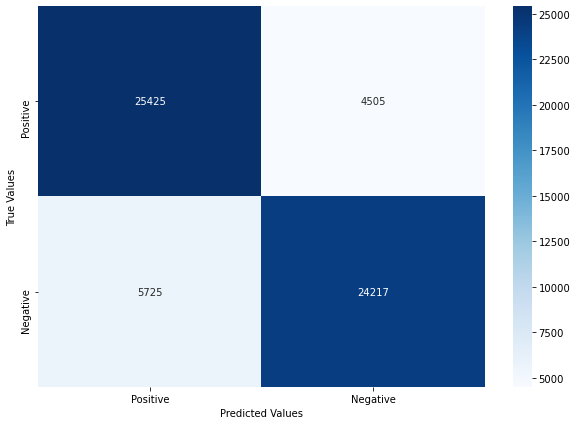

In [90]:
import seaborn as sn
import matplotlib.pyplot as plt
plt.figure(figsize = (10,7))
ax = plt.axes()
sn.heatmap(cm, annot=True,xticklabels=['Positive','Negative'], yticklabels=['Positive','Negative'],cmap="Blues",fmt='g')
ax.set(xlabel='Predicted Values', ylabel='True Values')

#### Clear to see that the model gets most of the sentiment classifications correct, but about 10000 wrong on both positive and negative classifications. This could maybe be improved if the model was trained on the entire dataset and not a chunk of it, it could also be improved by annotating the training data better. The final model had an F1 score of 0.84 and performed fairly accurate in the classifications.